In [2]:
!pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 5.3/5.3 MB 6.4 MB/s eta 0:00:00
  Using cached promise-2.3.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 101.5/101.5 kB ? eta 0:00:00
     ---------------------------------------- 52.3/52.3 kB ? eta 0:00:00
     ---------------------------------------- 146.5/146.5 kB ? eta 0:00:00
     -------------------------------------- 223.0/223.0 kB 6.9 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=7468834e60eb5dd706d808c06ec53db3b5fffabf36af17d68ed6c9ca35b69d8f
  Stored in directory: c:\users\winif chung\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
#!pip install tensorflow_datasets

import os        
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds


In [2]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def gen_model():
    
    
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.1),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(rate=0.10),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # 3 output neuron for the 3 classes of Animal Images
    tf.keras.layers.Dense(3, activation='softmax')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

    return model



In [3]:
model = gen_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [4]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def train_test_animals():        
    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
    
    import matplotlib.pyplot as plt

   
    #training data
    train_generator = train_datagen.flow_from_directory(
        'D:\\Teach_n_Train\\Advanced_Lessons_CV\\LABS\\cnn_binary\\CNN_MultiClass\\animals',  # Source directory
        target_size=(150, 150),  # Resizes images
        batch_size=15,
        class_mode='categorical',subset = 'training')
    

    epochs = 10
    #Testing data
    validation_generator = train_datagen.flow_from_directory(
    'D:\\Teach_n_Train\\Advanced_Lessons_CV\\LABS\\cnn_binary\\CNN_MultiClass\\validation',
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',
    subset='validation') # set as validation data
    
    model = gen_model()
    #Model fitting for a number of epochs
    history = model.fit_generator(
      train_generator,
      steps_per_epoch=150,
      epochs=epochs,
      validation_data = validation_generator,
      validation_steps = 50,
      verbose=1)
    
        
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    #This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
 
    # returns accuracy of training
    print("Training Accuracy:"), print(history.history['acc'][-1])
    print("Testing Accuracy:"), print (history.history['val_acc'][-1])

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


C:\Users\WinIF Chung\AppData\Local\Temp\ipykernel_16220\2403335266.py:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
150/150 [==============================] - 36s 238ms/step - loss: 0.9638 - acc: 0.5276 - val_loss: 0.7452 - val_acc: 0.5893
Epoch 2/10
150/150 [==============================] - 27s 183ms/step - loss: 0.6896 - acc: 0.6431 - val_loss: 0.7052 - val_acc: 0.6347
Epoch 3/10
150/150 [==============================] - 27s 183ms/step - loss: 0.5941 - acc: 0.7147 - val_loss: 0.6512 - val_acc: 0.6747
Epoch 4/10
150/150 [==============================] - 26s 174ms/step - loss: 0.5152 - acc: 0.7720 - val_loss: 0.6393 - val_acc: 0.6880
Epoch 5/10
150/150 [==============================] - 26s 176ms/step - loss: 0.4004 - acc: 0.8196 - val_loss: 0.6929 - val_acc: 0.7040
Epoch 6/10
150/150 [==============================] - 26s 174ms/step - loss: 0.3127 - acc: 0.8627 - val_loss: 0.8340 - val_acc: 0.6960
Epoch 7/10
150/150 [==============================] - 26s 173ms/step - loss: 0.2502 - acc: 0.8969 - val_loss: 0.8198 - val_acc: 0.7067
Epoch 8/10
150/150 [==============================] - 2

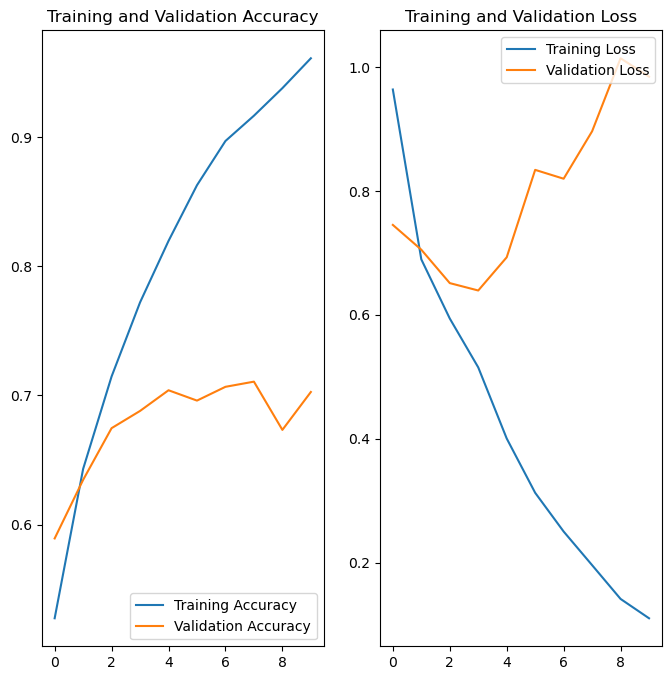

Training Accuracy:
0.9608888626098633
Testing Accuracy:
0.7026666402816772


In [5]:
train_test_animals()